# matplotlib・seabornを用いた可視化まとめ

## 準備
***

始める前に。。。  
matplotlibの階層構造がわからなくなったら、下記のリンクを訪れてみましょう。  
[matplotlib Usage Guide](https://matplotlib.org/stable/tutorials/introductory/usage.html)

最初にざっくり階層構造を書いておきます。  
> **Figure** ： グラフを格納する箱、最上層の箱  
> **Axes** ： Figureのひとつ内側の箱、まさにここにグラフを書く  
> **Title** ： グラフタイトル  
> **Line** ： グラフの線  
> **Markers** ： グラフの点  
> **Y axis label** ： Y軸のキャプション  
> **X axis label** ： X軸のキャプション  
> **Legend** ： 凡例  
> **Grid** ： 目盛線  
> **Spines** ： 外側の線  
> **Major tick** ： 目盛間隔  
> **Major tick label** ： 目盛スケール  
> **Minor tick** ： 補助目盛間隔  
> **Minor tick label** ： 補助目盛スケール

グラフを作る前に、必要なライブラリをインポートしておきます。

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Line graph(折れ線グラフ)
***

データの準備をします。  
ここでは適当に0~10の乱数を使います。

In [2]:
x_lineGraph = np.arange(10)
y_lineGraph = x_lineGraph * np.random.rand(10)

データの中身を見てみます。

In [3]:
print('x_lineGraph...')
print(x_lineGraph)
print('y_lineGraph...')
print(y_lineGraph)

x_lineGraph...
[0 1 2 3 4 5 6 7 8 9]
y_lineGraph...
[0.         0.574349   1.76067777 0.40342415 0.76167155 4.57762493
 2.8893938  4.77092411 1.23403352 4.46909647]


折れ線グラフで可視化をします。

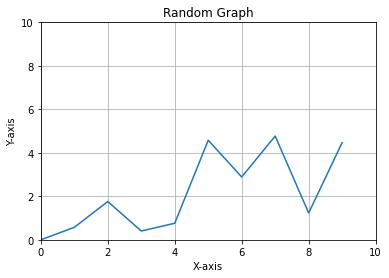

In [12]:
# 1. FigureとAxesを準備
fig, ax = plt.subplots()

# 2. グラフタイトルを設定
ax.set_title("Random Graph")

# 3. X軸、y軸キャプションを設定
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")

# 4. X軸、y軸の範囲を指定
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])

# 5. 凡例を設定
# ax.legend()

# 6. 目盛線を設定
ax.grid()

# 7. プロット

ax.plot(x_lineGraph, y_lineGraph)

## 色  
グレースケール、RGB、16進数カラーコード、色の頭文字で指定できる。  
```color = 0.5, color = (255, 255, 255), color = '#0f0f0f', color = 'g'```  
[色一覧](https://matplotlib.org/2.0.2/examples/color/named_colors.html)

## 線種  
直感的に指定できる。  
```ls = ':', ls = '-.', ls = '--', ls = '-'```  
[線種一覧](https://matplotlib.org/3.0.3/gallery/lines_bars_and_markers/line_styles_reference.html)

## マーカー  
直感的に指定できる。  
```marker = '.', marker = ',', marker = 'o', marker = 'v'```  
[マーカー一覧](https://matplotlib.org/stable/api/markers_api.html)